In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import winsound

In [2]:
img_array=cv2.imread("Dataset/Origianl_data_set/mrlEyes_2018_01/Open_Eyes/test_1.png",cv2.IMREAD_GRAYSCALE)

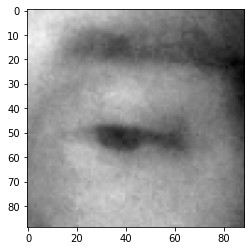

In [3]:
plt.imshow(img_array,cmap='gray')

In [4]:
img_array.shape #Finding the shape of the image 

(89, 89)

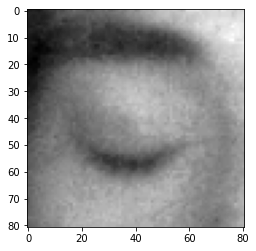

In [5]:
#Opened Eyes and closed eyes
Datadirectory="Dataset/Origianl_data_set/mrlEyes_2018_01/"#training dataset
Classes=["Closed_Eyes","Open_Eyes"]#list of classes 
for category in Classes:
    path=os.path.join(Datadirectory,category)
#     print(path)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
#         backtorgb=cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break
        

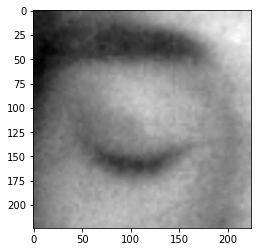

In [6]:
#resize the image
img_size=224

new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array,cmap="gray")
plt.show()

In [7]:
#Now reading all the images and converting them into an array for data and labels
training_data=[]
def create_training_data():
    for category in Classes:
        path=os.path.join(Datadirectory,category)
        class_num=Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                backtorgb=cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array=cv2.resize(backtorgb,(img_size,img_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

In [8]:
create_training_data()
#difference between gray and rgb is rgb have 3 channels and gray not have those channels


In [9]:
# for img in os.listdir(path):
#     plt.imshow(img,cmap="gray")

In [10]:
#do random shuffling to avoid overfitting for that import random
import random

random.shuffle(training_data)

In [11]:
x=[]
y=[]

for features,label in training_data:
    x.append(features)
    y.append(label)


x=np.array(x).reshape(-1,img_size,img_size,3)

In [12]:
x.shape
#converted into the rgb (imagenet)

(3241, 224, 224, 3)

In [13]:
#in tranfer learning the input must be the same on which it was previously trained
#normalisation
x=x/255.0

In [14]:
y=np.array(y)

In [15]:
#saving data
import pickle

pickle_out=open("x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [16]:
pickle_in=open("x.pickle","rb")
x=pickle.load(pickle_in)

pickle_in=open("y.pickle","rb")
y=pickle.load(pickle_in)

In [17]:
#Deep learing model for training -Training Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import  layers

In [18]:
#mobile net was light weight and easy to implement
model=tf.keras.applications.mobilenet.MobileNet()

In [19]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [20]:
#transfer learning
base_input=model.layers[0].input #input


In [21]:
l=[]
for a in model.layers:
    l.append(a)
print(len(l))

91


In [22]:
base_output=model.layers[-4].output

In [23]:
base_output

<KerasTensor: shape=(None, 1, 1, 1024) dtype=float32 (created by layer 'dropout')>

In [24]:
Flat_layers=layers.Flatten()(base_output)
final_output=layers.Dense(1)(Flat_layers)##one node(1/ 0)
final_output=layers.Activation("sigmoid")(final_output)#sigmoid is better for the binary classsification


In [25]:
print(final_output)

KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='activation/Sigmoid:0', description="created by layer 'activation'")


In [26]:
new_model=keras.Model(inputs=base_input,outputs=final_output)   

In [27]:
#in this new model the parameters are reduced and a flattern layer is added
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [28]:
#now compile based on binary classfication 
new_model.compile(loss="binary_crossentropy",optimizer='adam',metrics=["accuracy"])
#most preffered optimizer is adam
#binary cross entropy formula:

In [29]:
#Training
#trainable parametes?
new_model.fit(x,y,epochs = 2,validation_split=0.1)
#it is training on 92 samples 

Epoch 1/2
92/92 [==============================] - 404s 4s/step - loss: 0.1300 - accuracy: 0.9599 - val_loss: 4.1195 - val_accuracy: 0.5446
Epoch 2/2
92/92 [==============================] - 294s 3s/step - loss: 0.0526 - accuracy: 0.9825 - val_loss: 0.6331 - val_accuracy: 0.8000


In [30]:
new_model.save('my_model.h5')

In [31]:
new_model=tf.keras.models.load_model('my_model_youtube.h5')

In [32]:
#checking the network for predictions
img_array=cv2.imread("Dataset/Origianl_data_set/mrlEyes_2018_01/Closed_Eyes/test_1.png",cv2.IMREAD_GRAYSCALE)
backtorgb=cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array=cv2.resize(backtorgb,(img_size,img_size))

In [33]:
x_input=np.array(new_array).reshape(1,img_size,img_size,3)

In [34]:
x_input.shape

(1, 224, 224, 3)

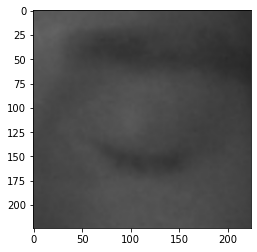

In [35]:
plt.imshow(new_array)

In [36]:
x_input=x_input/255.0

In [37]:
prediction=new_model.predict(x_input)

1/1 [==============================] - 0s 375ms/step


In [38]:
prediction

array([[21.7502]], dtype=float32)

In [39]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [40]:
#Checking
img=cv2.imread('Test\image-1.jpg')

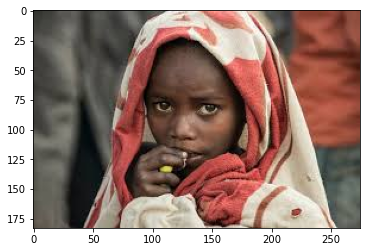

In [41]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [42]:
#crop the eyes
#1,detect faces
face_cascade=cv2.CascadeClassifier(cv2.data.haarcascades+'C://Users//venka//anaconda3//Lib//site-packages//cv2//data//haarcascade_frontalface_default.xml')

In [43]:
# plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [44]:
# gray2=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [45]:
# faces=face_cascade.detectMultiScale(gray2,1.1,4)

In [46]:
eye_cascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')

In [47]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [48]:
gray

array([[50, 50, 51, ..., 93, 93, 93],
       [51, 51, 51, ..., 93, 93, 93],
       [52, 52, 52, ..., 94, 94, 94],
       ...,
       [79, 82, 86, ..., 86, 84, 81],
       [77, 80, 84, ..., 86, 84, 81],
       [75, 78, 82, ..., 87, 85, 82]], dtype=uint8)

In [49]:
eyes=eye_cascade.detectMultiScale(gray,1.1,4)

In [50]:
for (x,y,w,h) in eyes:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

In [51]:
img2=cv2.imread('Archirecture_mobilenet.png')

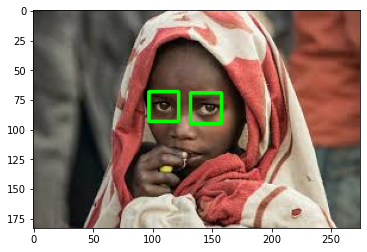

In [52]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [53]:
#Croping the eye image
eye_cascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
eyes=eye_cascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in eyes:
    roi_gray =gray[y:y+h,x:x+w]
    roi_color=img[y:y+h,x:x+w]
    eyess=eye_cascade.detectMultiScale(roi_gray)
    if len(eyess)==0:
        print("eyes are not detected")
    else:
        for (ex,ey,ew,eh) in eyess:
            eyes_roi=roi_color[ey:ey+eh,ex:ex+ew]
    

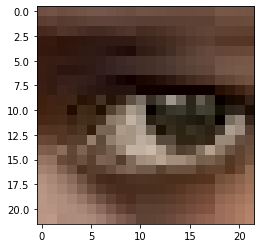

In [54]:
plt.imshow(cv2.cvtColor(eyes_roi,cv2.COLOR_BGR2RGB))

In [55]:
eyes_roi

array([[[ 66,  79, 111],
        [ 70,  83, 115],
        [ 64,  77, 109],
        ...,
        [ 71,  86, 118],
        [ 70,  85, 117],
        [ 68,  83, 115]],

       [[ 50,  61,  93],
        [ 53,  64,  94],
        [ 47,  58,  88],
        ...,
        [ 59,  75, 104],
        [ 59,  74, 106],
        [ 60,  75, 107]],

       [[ 29,  40,  70],
        [ 32,  44,  72],
        [ 42,  53,  81],
        ...,
        [ 50,  66,  95],
        [ 49,  64,  96],
        [ 46,  64,  95]],

       ...,

       [[134, 150, 186],
        [128, 145, 178],
        [126, 141, 174],
        ...,
        [ 84, 107, 153],
        [ 91, 115, 161],
        [ 97, 123, 169]],

       [[133, 149, 185],
        [131, 147, 183],
        [127, 142, 175],
        ...,
        [ 91, 113, 161],
        [ 98, 121, 169],
        [104, 130, 177]],

       [[134, 150, 186],
        [137, 153, 189],
        [123, 137, 173],
        ...,
        [ 92, 113, 164],
        [100, 123, 173],
        [106, 131, 181]]

In [56]:
final_image=cv2.resize(eyes_roi,(224,224))
final_image=np.expand_dims(final_image,axis=0)
final_image=final_image/255.0

In [57]:
# plt.imshow(cv2.cvtColor(final_image,cv2.COLOR_BGR2RGB))

In [58]:
# import tensorflow as tf
# import cv2
# import os
# import matplotlib.pyplot as plt
# import numpy as np
# import cv2
# new_model=tf.keras.models.load_model('my_model_youtube.h5')
# faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
# cap=cv2.VideoCapture(1)
# if not cap.isOpened():
#     cap=cv2.VideoCapture(0)
# if not cap.isOpened():
#     raise IOError("Cannot open webcam")
# while True:
#     ret,frame=cap.read()
#     #Croping the eye image
#     eye_cascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')
#     gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
#     eyes=eye_cascade.detectMultiScale(gray,1.1,4)
#     for x,y,w,h in eyes:
#         roi_gray =gray[y:y+h,x:x+w]
#         roi_color=frame[y:y+h,x:x+w]
#         cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
#         eyess=eye_cascade.detectMultiScale(roi_gray)
#         if len(eyess)==0:
#             print("eyes are not detected")
#         else:
#             for (ex,ey,ew,eh) in eyess:
#                 eyes_roi=roi_color[ey:ey+eh,ex:ex+ew]
#     final_image=cv2.resize(eyes_roi,(224,224))
#     final_image=np.expand_dims(final_image,axis=0)
#     final_image=final_image/255.0
#     Predictions=new_model.predict(final_image)
#     if Predictions>=22:
#         status="open eyes"
#     else:
#         status="close eyes"
#     gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
# #     print(faceCascade.empty())
#     faces=faceCascade.detectMultiScale(gray,1.1,4)

#     for (x,y,w,h) in faces:
#           cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
#     font=cv2.FONT_HERSHEY_SIMPLEX

#     cv2.putText(frame,status,(50,50),font,3,(0,0,255),2,cv2.LINE_4)
#     cv2.imshow('Drowsiness Detection Tutorial',frame)

#     if cv2.waitKey(10) & 0xFF==ord('q'):
#           break
# cap.release()
# cv2.destroyAllWindows()
    
    

In [ ]:
import winsound
frequency=2500
duration=1000
import numpy as np
import cv2

path="haarcascade_frontalface_default.xml"
new_model=tf.keras.models.load_model('my_model_youtube.h5')
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
try:
    cap=cv2.VideoCapture(1)
except:
    raise IOError("errors detected")
if not cap.isOpened():
      cap=cv2.VideoCapture(0)
if not cap.isOpened():
      raise IOError("Cannot open webcam")
counter=0
while True:
    ret,frame=cap.read()
    eye_cascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye_tree_eyeglasses.xml')
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    eyes=eye_cascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in eyes:
        roi_gray=gray[y:y+h, x:x+h]
        roi_color=frame[y:y+h, x:x+w]
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
        eyess=eye_cascade.detectMultiScale(roi_gray)
        if len(eyess)==0:
            print("Eyes are not detected")
        else:
            for(ex,ey,ew,eh) in eyess:
                eyes_roi=roi_color[ey:ey+eh, ex:ex+ew]
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces=faceCascade.detectMultiScale(gray,1.1,4)
    for(x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
    font=cv2.FONT_HERSHEY_SIMPLEX

    final_image=cv2.resize(eyes_roi,(224,224))
    final_image=np.expand_dims(final_image,axis=0)
    final_image=final_image/255.0
    Predictions=new_model.predict(final_image)
    if(Predictions>25.00):
        status="open eyes"
        cv2.putText(frame,status,(150,150),font,3,(0,255,0),2,cv2.LINE_4)
        x1,y1,w1,h1=0,0,175,75

        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,'Active',(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,0),2)
    else:
        counter=counter+1
        status="closed eyes"
        cv2.putText(frame,status,(150,150),font,3,(0,255,0),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),2)
        
        
        if counter>2:
            x1,y1,w1,h1=0,0,175,75
            cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
            cv2.putText(frame,'Sleep Alert!!!',(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
            winsound.Beep(frequency,duration)
            counter=0
    cv2.imshow("Drowsiness Detection",frame)
    
    if cv2.waitKey(2) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

Eyes are not detected
False
1/1 [==============================] - 0s 296ms/step
Eyes are not detected
Eyes are not detected
False
1/1 [==============================] - 0s 22ms/step
False
1/1 [==============================] - 0s 31ms/step
Eyes are not detected
False
1/1 [==============================] - 0s 31ms/step
Eyes are not detected
Eyes are not detected
False
1/1 [==============================] - 0s 47ms/step
False
1/1 [==============================] - 0s 31ms/step
False
1/1 [==============================] - 0s 32ms/step
False
1/1 [==============================] - 0s 39ms/step
Eyes are not detected
False
1/1 [==============================] - 0s 48ms/step
False
1/1 [==============================] - 0s 48ms/step
False
1/1 [==============================] - 0s 31ms/step
False
1/1 [==============================] - 0s 63ms/step
False
1/1 [==============================] - 0s 32ms/step
Eyes are not detected
False
1/1 [==============================] - 0s 26ms/step
False
1/1 [

False
1/1 [==============================] - 0s 27ms/step
False
1/1 [==============================] - 0s 63ms/step
False
1/1 [==============================] - 0s 31ms/step
False
1/1 [==============================] - 0s 50ms/step
False
1/1 [==============================] - 0s 25ms/step
False
1/1 [==============================] - 0s 26ms/step
Eyes are not detected
Eyes are not detected
False
1/1 [==============================] - 0s 33ms/step
False
1/1 [==============================] - 0s 43ms/step
False
1/1 [==============================] - 0s 28ms/step
False
1/1 [==============================] - 0s 48ms/step
False
1/1 [==============================] - 0s 31ms/step
False
1/1 [==============================] - 0s 35ms/step
False
1/1 [==============================] - 0s 61ms/step
False
1/1 [==============================] - 0s 25ms/step
False
1/1 [==============================] - 0s 47ms/step
Eyes are not detected
False
1/1 [==============================] - 0s 47ms/step
False


In [30]:
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))

NameError: name 'img2' is not defined